# Visualization

The purpose of this notebook is to provide a simple way to visualize the results of the analysis.

## Part 1: Importing the results.

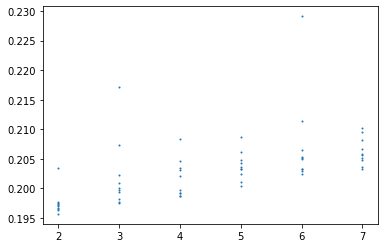

In [2]:
data = []
setSize = []

for i in range(2, 8):
    for j in range(1, 11):
        fileName = "times/hil_n" + str(i) + "_case_" + str(j) + ".txt"
        f = open(fileName, "r")
        data.append(f.read())
        f.close()
        setSize.append(i)

avrgTime = []

for i in range(len(data)):
    avrgTime.append(float(data[i].split(';')[0])/1000000)

# plot avrgTime against setSize as dots
import matplotlib.pyplot as plt
plt.plot(setSize, avrgTime, 'o', markersize=1)

In [3]:
# export avrgTime as csv
import csv
with open('tables/avrgTime.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=';', lineterminator='\n')
    writer.writerow(['setSize', 'avrgTime'])
    for i in range(len(setSize)):
        writer.writerow([setSize[i], int(avrgTime[i]*1000000)])

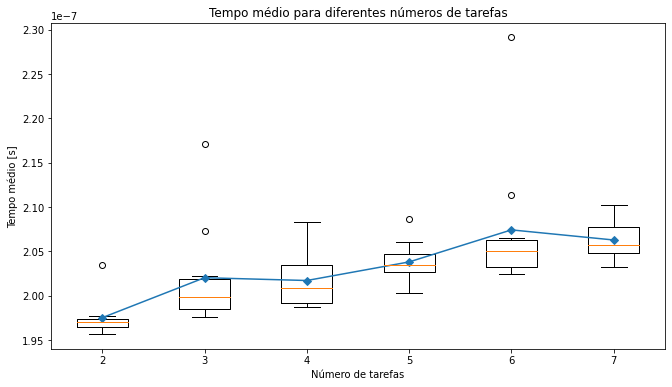

In [51]:
import matplotlib.pyplot as plt

fmtAvrgTime = []
fmtSetSize = []
fmtAvrgAvrg = []
for i in range(6):
    fmtAvrgTime.append([])
    fmtSetSize.append(i+2)
    for j in range(10):
        fmtAvrgTime[i].append(float(avrgTime[i*10+j])/1000000)
    fmtAvrgAvrg.append(sum(fmtAvrgTime[i])/10)

plt.figure(figsize =(11, 6))
plt.boxplot(fmtAvrgTime, labels=fmtSetSize)
plt.plot([fmtSetSize[i]-1 for i in range(len(fmtSetSize))], fmtAvrgAvrg, 'D-')
plt.xlabel('Set size')
plt.ylabel('Average time (s)')
plt.title('Average time for different set sizes')
plt.savefig('graphs/en-times.svg', format='svg', dpi=1200)
plt.xlabel('Número de tarefas')
plt.ylabel('Tempo médio [s]')
plt.title('Tempo médio para diferentes números de tarefas')
plt.savefig('graphs/pt-times.svg', format='svg', dpi=1200)
# plt.show()
